The new point [4, 4.5] is classified as: Class A


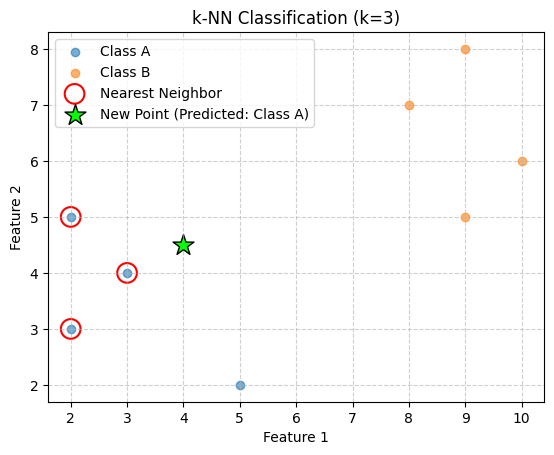

The new point [5.5, 5.5] is classified as: Class B


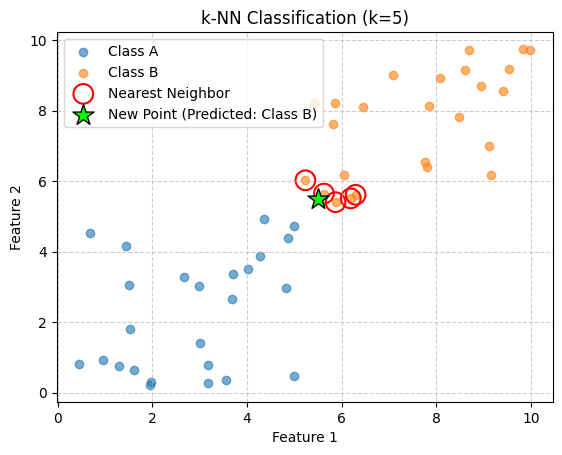

In [1]:
import math
from collections import Counter
import matplotlib.pyplot as plt
import random

def distance(point1, point2):
    """
    Calculates the Euclidean distance between two points (vectors).
    """
    # Assuming points are lists or tuples of numbers
    squared_diffs = [(p - q) ** 2 for p, q in zip(point1, point2)]
    return math.sqrt(sum(squared_diffs))


def raw_majority_vote(labels):
    votes =  Counter(labels)
    winner , _ = votes.most_common(1)[0]

def majority_vote(labels):
    """ Assumes that labels are ordered from the nearest to farthest """
    vote_counts = Counter(labels)
    winner , winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count
                       for count in vote_counts.values()
                       if count == winner_count])
    

    if num_winners == 1 : 
        return winner;
    else:
        return majority_vote(labels[:-1])

def knn_classify(k, labeled_points, new_point):
    # Sort the points by distance from new_point
    by_distance = sorted(labeled_points,
                         key=lambda item: distance(item[0], new_point))

    # Find the labels for the k nearest
    k_nearest_labels = [label for _, label in by_distance[:k]]

    # Return the majority vote
    return majority_vote(k_nearest_labels)


def visualize_knn(labeled_points, new_point, k, prediction, nearest_neighbors):
    """
    Creates a scatter plot to visualize the k-NN classification.
    """
    points_by_class = {}
    for point, label in labeled_points:
        if label not in points_by_class:
            points_by_class[label] = []
        points_by_class[label].append(point)

    fig, ax = plt.subplots()

    # Plot each class of labeled points
    for label, points in points_by_class.items():
        x = [p[0] for p in points]
        y = [p[1] for p in points]
        ax.scatter(x, y, label=label, alpha=0.6)

    # Highlight the k-nearest neighbors with a prominent red circle
    neighbor_points = [point for point, label in nearest_neighbors]
    for point in neighbor_points:
        ax.scatter(point[0], point[1], s=200, facecolors='none', edgecolors='red', linewidth=1.5, label='Nearest Neighbor')

    # Plot the new point to be classified
    ax.scatter(new_point[0], new_point[1], color='lime', marker='*', s=250, edgecolor='black', label=f"New Point (Predicted: {prediction})")

    # To avoid duplicate labels in the legend
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys())

    ax.set_title(f"k-NN Classification (k={k})")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.grid(True, linestyle='--', alpha=0.6)
    plt.show()

if __name__ == "__main__":
    # Create some sample data: list of ([coordinates], label)
    labeled_points = [
        ([2, 3], "Class A"), ([3, 4], "Class A"),
        ([5, 2], "Class A"), ([2, 5], "Class A"),
        ([8, 7], "Class B"), ([9, 8], "Class B"),
        ([10, 6], "Class B"), ([9, 5], "Class B")
    ]

    # Define a new point we want to classify
    new_point = [4, 4.5]

    # Set the value of k (number of neighbors to check)
    k = 3

    # --- Perform Classification & Gather Data for Plotting ---
    
    # 1. Sort points by distance
    by_distance = sorted(labeled_points, key=lambda item: distance(item[0], new_point))
    
    # 2. Get the k-nearest neighbors
    k_nearest_neighbors = by_distance[:k]
    
    # 3. Get just the labels of those neighbors for voting
    k_nearest_labels = [label for _, label in k_nearest_neighbors]
    
    # 4. Get the final prediction
    prediction = majority_vote(k_nearest_labels)
    
    # --- Output Results ---
    
    # Print the text result
    print(f"The new point {new_point} is classified as: {prediction}")
    
    # Call the function to display the graph
    visualize_knn(labeled_points, new_point, k, prediction, k_nearest_neighbors)


if __name__ == "__main__":
    # Make sure you have "import random" at the top of your file!

    # --- Generate a larger, more interesting dataset ---
    labeled_points = []
    # Generate 25 points for Class A in the lower-left area
    for _ in range(25):
        point = [random.uniform(0, 5), random.uniform(0, 5)]
        labeled_points.append((point, "Class A"))

    # Generate 25 points for Class B in the upper-right area
    for _ in range(25):
        point = [random.uniform(5, 10), random.uniform(5, 10)]
        labeled_points.append((point, "Class B"))

    # Define a new point we want to classify (placed in the middle)
    new_point = [5.5, 5.5]

    # Set the value of k (number of neighbors to check)
    k = 5

    # --- Perform Classification & Gather Data for Plotting ---
    by_distance = sorted(labeled_points, key=lambda item: distance(item[0], new_point))
    k_nearest_neighbors = by_distance[:k]
    k_nearest_labels = [label for _, label in k_nearest_neighbors]
    prediction = majority_vote(k_nearest_labels)
    
    # --- Output Results ---
    print(f"The new point {new_point} is classified as: {prediction}")
    visualize_knn(labeled_points, new_point, k, prediction, k_nearest_neighbors)

    